In [1]:
import pandas as pd
import seaborn as sns
merged = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\DS\Internship\Cleaned_merged_data_Dhanshree.csv")

#Extracting relevant features 
features  = ["Price (INR)","Number Booked","MaxBookees"]
model = merged[features].copy()
print(model.head())

   Price (INR)  Number Booked  MaxBookees
0          499             12          25
1          499             15          25
2          499             14          25
3          499              9          25
4          499              7          25


<Axes: >

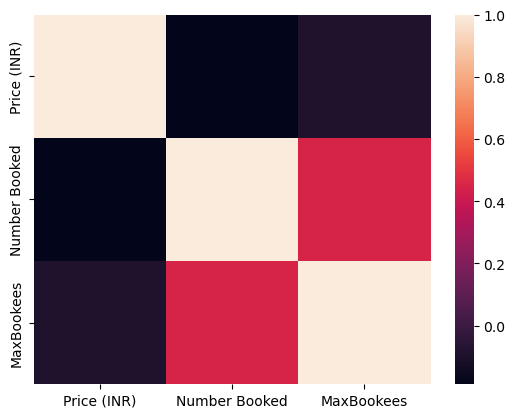

In [14]:
#Checking correlation between columns
corr = model.corr()
sns.heatmap(corr)

In [3]:
from sklearn.model_selection import train_test_split  #used for splitting dataset into training and testing datasets
from sklearn.linear_model import LinearRegression   #used for creating and training a linear regression model

X = model[['Price (INR)', 'MaxBookees']]
y = model['Number Booked']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model_reg.predict(X_test)

In [4]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 72.67988127839385
R-squared: 0.20902090396789896


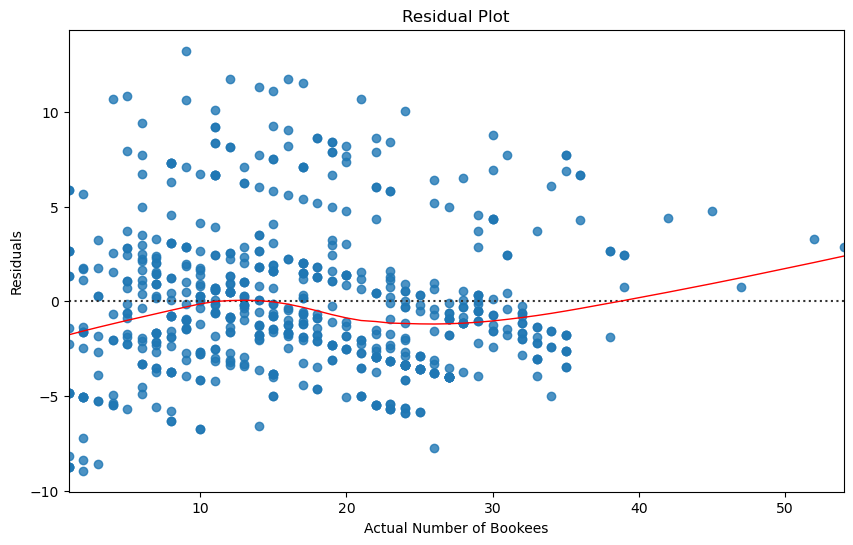

In [5]:
# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot')
plt.xlabel('Actual Number of Bookees')
plt.ylabel('Residuals')
plt.show()